In [157]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
%matplotlib nbagg
#%matplotlib notebook
#from sample.data import gen_kura_data
N = 100
D = 3
L = 2
resolution = 15
K = resolution**L
T = 100
tau = 80
sigma_min = 0.3
sigma_max = 1.2

seed = 0
np.random.seed(seed)

In [158]:
def gen_kura_data(num):
#    num = params.num_samples
    np.random.seed(seed)
    z1 = np.random.uniform(low=-1, high=+1, size=(num))
    z2 = np.random.uniform(low=-1, high=+1, size=(num))

    X = np.empty(shape=(num, D))
    X[:, 0] = z1
    X[:, 1] = z2
    X[:, 2] = 0.5 * (z1**2 - z2**2)
    return X

In [159]:
X = gen_kura_data(N)
print(X.shape)

(100, 3)


<IPython.core.display.Javascript object>


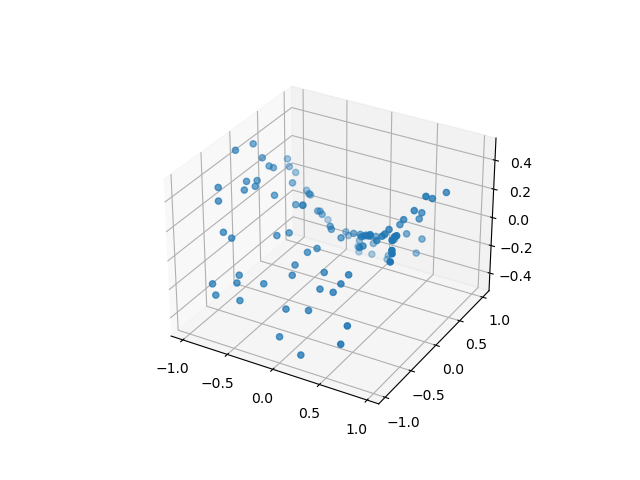

In [160]:
plt.close()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()

(225, 2)


<IPython.core.display.Javascript object>


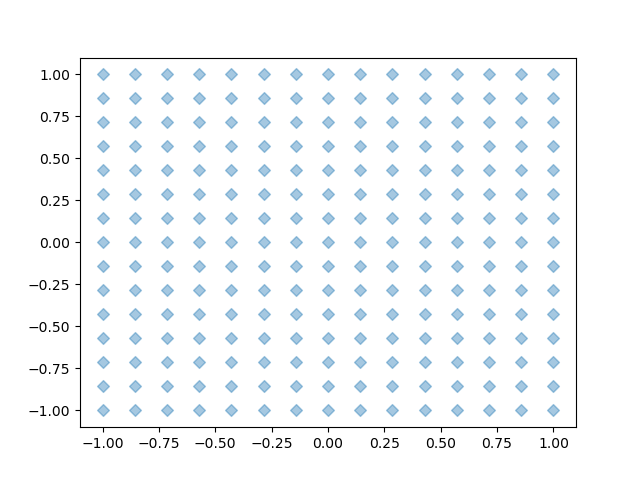

In [161]:
A = np.linspace(-1,1,resolution)
B = np.linspace(-1,1,resolution)
XX, YY = np.meshgrid(A,B)
M = np.concatenate([XX.reshape(-1)[:,None], YY.reshape(-1)[:,None]], axis=1)
print(M.shape)
plt.close()
plt.scatter(M[:, 0], M[:, 1], alpha=0.4, marker='D')

<IPython.core.display.Javascript object>


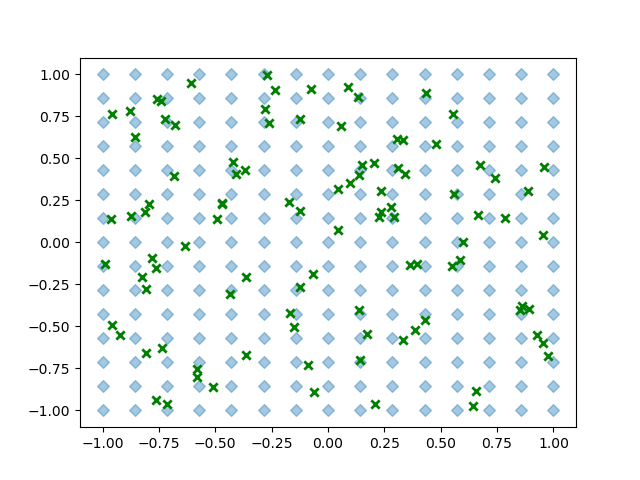

In [162]:
#真の潜在変数
plt.close()
fig = plt.figure()
plt.scatter(M[:, 0], M[:, 1], alpha=0.4, marker='D')
plt.scatter(X[:, 0], X[:, 1], color='g', marker='x', linewidth=2)
plt.show()

In [163]:
np.random.seed(seed)
Z = 2*np.random.rand(N, L)-1
print(Z.shape)
#print(Z)

(100, 2)


<IPython.core.display.Javascript object>


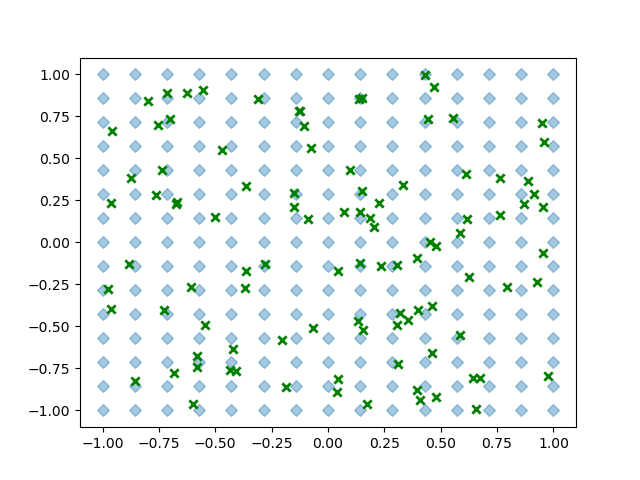

In [164]:
plt.close()
plt.scatter(M[:, 0], M[:, 1], alpha=0.4, marker='D')
plt.scatter(Z[:, 0], Z[:, 1], color='g', marker='x', linewidth=2)

In [165]:
#データの距離
def distance(A, B):
    #Aはデータ(こっちで用意するやつ),Bは構造(ノード)
    Dist = np.sum((A[:, None, :]-B[None, :, :])**2, axis=2)
    return Dist

In [166]:
dist = distance(Z,M)
print(dist.shape)

(100, 225)


In [167]:
#参照ベクトルの推定
def estimate_y(Z, M, tau, t):
    sigma = max((sigma_min-sigma_max)*(t/tau)+sigma_max, sigma_min)
    #sigma = max(sigma_max*np.exp(-t/tau), sigma_min)
    #print(sigma)
    #R_knの集合R
    R_nk = np.exp((-1/(2*(sigma**2)))*distance(Z, M))
    R_kn = R_nk.T
    #g_kの集合G
    G = np.sum(R_kn, axis=1)
    #Y = np.sum([(R[n]*X[n])/G[n] for n in range(N)]) 
    #h_nk:k番目の参照ベクトルにおけるx_nの比率
    #h_nkの集合
    H = R_kn/G[:, None]
    Y = H @ X
    return Y

In [168]:
#estimate_y(Z, M, 10)

In [169]:
#潜在変数の推定
def estimate_z(X, Y):
    K_star = np.argmin(distance(X, Y), axis=1)
#    print(K_star,K_star.shape)
    Z = M[K_star]
#    print(Z, Z.shape)
    
    return Z

In [170]:
#aaa=estimate_z(X, estimate_y(Z, M, 10))
#plt.scatter(M[:, 0], M[:, 1], alpha=0.4, marker='D')
#plt.scatter(aaa[:, 0], aaa[:, 1], color='g', marker='x', linewidth=2)
#print(aaa)

In [171]:
y_hist=[]
z_hist=[]
for t in range(T):
    Y = estimate_y(Z, M, tau, t)
    y_hist.append(Y)
    Z = estimate_z(X, Y)
    z_hist.append(Z)

In [172]:
print(np.shape(z_hist))

(100, 100, 2)


<IPython.core.display.Javascript object>


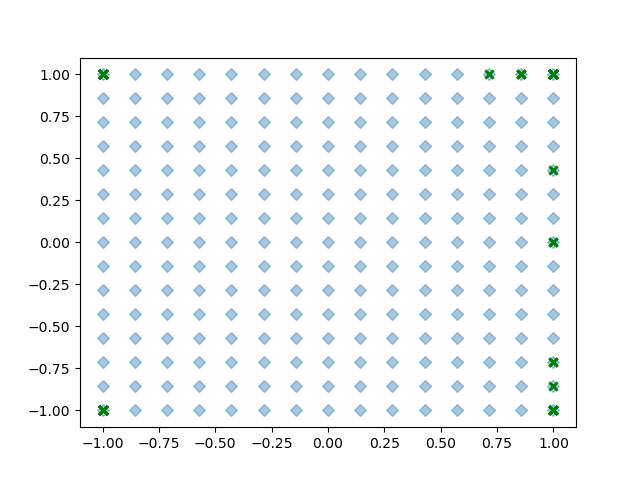

In [173]:
plt.close()
Z = z_hist[0]
#i = 50
#z_hist = np.array(z_hist)
plt.scatter(M[:, 0], M[:, 1], alpha=0.4, marker='D')
plt.scatter(Z[:, 0], Z[:, 1], color='g', marker='x', linewidth=2)
#plt.scatter(z_hist[i, :, 0], z_hist[i, :, 1], color='g', marker='x', linewidth=2)
plt.show()

In [174]:
Y = y_hist[0]
print(Y.shape, Y[0,:])

(225, 3) [-0.03136796  0.03608342  0.02713344]


In [175]:
#潜在変数描画奴
def update(i):
    ax1.cla()
    ax2.cla()
    Z = z_hist[i]
    Y = y_hist[i]
    
    plt.title(f"学習回数{i+1}回目", fontname="MS Gothic")
    ax1.scatter(X[:, 0], X[:, 1], X[:, 2])
    ax1.plot_wireframe(Y[:, 0].reshape(15,15), Y[:, 1].reshape(15,15), Y[:, 2].reshape(15,15), color='k')
    ax2.scatter(M[:, 0], M[:, 1], alpha=0.4, marker='D')
    ax2.scatter(Z[:, 0], Z[:, 1], color='g', marker='x', linewidth=2)

In [176]:
#テスト用
def plot(data):
    plt.cla()                      # 現在描写されているグラフを消去
    rand = np.random.randn(100)    # 100個の乱数を生成
    im = plt.plot(rand)            # グラフを生成

<IPython.core.display.Javascript object>


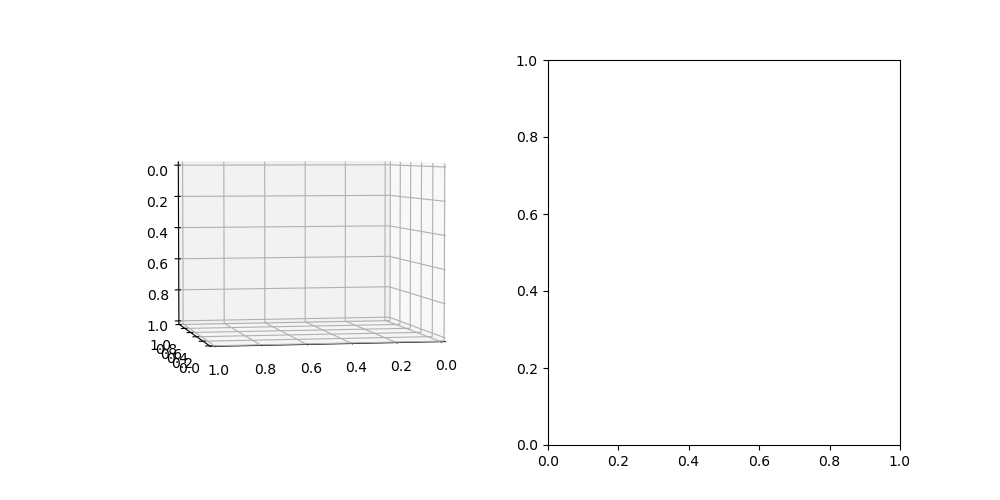

In [177]:
#潜在変数アニメーション
plt.close()
fig = plt.figure(figsize=(10,5))
#fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)
viewer = animation.FuncAnimation(fig, update)
plt.show()

In [178]:
ani = animation.FuncAnimation(fig, update)
ani.save(f"z_history_min{sigma_min}_max{sigma_max}.gif", writer="pillow")

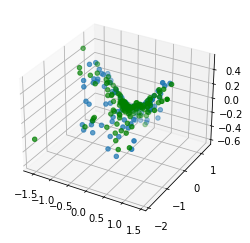

In [54]:
plt.close()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c='g')
plt.show()